<h1>Grupo GCPI - Modelo preditivo Rappi</h1>

**Links importantes**❕
*   Base de dados: https://drive.google.com/drive/folders/18yMhpE-YkF8RF-a74u7A6Cm-1B7LdzrS
*   Drive do grupo: https://drive.google.com/drive/u/3/folders/1lLr3O8EzUMJs_mPE2Eq0BTamVE26lSfh



---



## Importação e conexão ✈


In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import datetime
from operator import index

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Df base

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Bases/infos gerais.csv", usecols={'ID', 'ULTIMO_PEDIDO'})
df.head()
# Ultima data = 2022-08-01

,ID,ULTIMO_PEDIDO
0,1561246,2022-08-01T00:00:00Z
1,1561210,2022-08-01T00:00:00Z
2,1561205,2022-08-01T00:00:00Z
3,1561173,2022-08-01T00:00:00Z
4,1561132,2022-08-01T00:00:00Z


In [ ]:
df[['Date', 'exclude']] = df['ULTIMO_PEDIDO'].str.split('T', expand=True)
df

,ID,ULTIMO_PEDIDO,Date,exclude
0,1561246,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z
1,1561210,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z
2,1561205,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z
3,1561173,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z
4,1561132,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z
...,...,...,...,...
180173,33188,2021-11-03T00:00:00Z,2021-11-03,00:00:00Z
180174,33161,2022-07-05T00:00:00Z,2022-07-05,00:00:00Z
180175,33052,2021-12-19T00:00:00Z,2021-12-19,00:00:00Z
180176,33051,2022-03-23T00:00:00Z,2022-03-23,00:00:00Z


In [ ]:
df['Date']= df['Date'].astype('datetime64[ns]')
df['Date'].max()

Timestamp('2022-08-01 00:00:00')

In [ ]:
df['Diferenca_Dias'] = df['Date'].max() - df['Date']
df

,ID,ULTIMO_PEDIDO,Date,exclude,Diferenca_Dias
0,1561246,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z,0 days
1,1561210,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z,0 days
2,1561205,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z,0 days
3,1561173,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z,0 days
4,1561132,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z,0 days
...,...,...,...,...,...
180173,33188,2021-11-03T00:00:00Z,2021-11-03,00:00:00Z,271 days
180174,33161,2022-07-05T00:00:00Z,2022-07-05,00:00:00Z,27 days
180175,33052,2021-12-19T00:00:00Z,2021-12-19,00:00:00Z,225 days
180176,33051,2022-03-23T00:00:00Z,2022-03-23,00:00:00Z,131 days


In [ ]:
for i in  df.select_dtypes(include=['datetime64']).columns.tolist():
    df['Diferenca_Dias'] = df['Diferenca_Dias'].astype(str)

In [ ]:
df[['dif_num', 'exclude_3']] = df['Diferenca_Dias'].str.split(' ', expand=True)
df['CHURN'] = df['dif_num'].astype(int)
df

,ID,ULTIMO_PEDIDO,Date,exclude,Diferenca_Dias,dif_num,exclude_3,CHURN
0,1561246,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z,0 days,0,days,0
1,1561210,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z,0 days,0,days,0
2,1561205,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z,0 days,0,days,0
3,1561173,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z,0 days,0,days,0
4,1561132,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z,0 days,0,days,0
...,...,...,...,...,...,...,...,...
180173,33188,2021-11-03T00:00:00Z,2021-11-03,00:00:00Z,271 days,271,days,271
180174,33161,2022-07-05T00:00:00Z,2022-07-05,00:00:00Z,27 days,27,days,27
180175,33052,2021-12-19T00:00:00Z,2021-12-19,00:00:00Z,225 days,225,days,225
180176,33051,2022-03-23T00:00:00Z,2022-03-23,00:00:00Z,131 days,131,days,131


In [ ]:
df['CHURN'] = np.where(df['CHURN'] < 21, 0, df['CHURN'])
df['CHURN'] = np.where(df['CHURN'] >= 21, 1, df['CHURN'])
df

,ID,ULTIMO_PEDIDO,Date,exclude,Diferenca_Dias,dif_num,exclude_3,CHURN
0,1561246,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z,0 days,0,days,0
1,1561210,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z,0 days,0,days,0
2,1561205,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z,0 days,0,days,0
3,1561173,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z,0 days,0,days,0
4,1561132,2022-08-01T00:00:00Z,2022-08-01,00:00:00Z,0 days,0,days,0
...,...,...,...,...,...,...,...,...
180173,33188,2021-11-03T00:00:00Z,2021-11-03,00:00:00Z,271 days,271,days,1
180174,33161,2022-07-05T00:00:00Z,2022-07-05,00:00:00Z,27 days,27,days,1
180175,33052,2021-12-19T00:00:00Z,2021-12-19,00:00:00Z,225 days,225,days,1
180176,33051,2022-03-23T00:00:00Z,2022-03-23,00:00:00Z,131 days,131,days,1


In [ ]:
df = df.drop(['ULTIMO_PEDIDO', 'Date', 'exclude', 'Diferenca_Dias', 'dif_num', 'exclude_3'], axis=1)
df

,ID,CHURN
0,1561246,0
1,1561210,0
2,1561205,0
3,1561173,0
4,1561132,0
...,...,...
180173,33188,1
180174,33161,1
180175,33052,1
180176,33051,1


In [ ]:
df.isnull().sum()

ID       0
CHURN    0
dtype: int64

## Infos Gerais

In [ ]:
df_infos = pd.read_csv("/content/drive/MyDrive/Bases/infos gerais.csv", usecols=['ID', 'AUTO_ACEITE', 'GORJETA', 'FRETE_MEDIO', 'TRANSPORTE', 'DATA_NASCIMENTO', 'CIDADE'])

In [ ]:
df_infos.head()

,ID,DATA_NASCIMENTO,CIDADE,TRANSPORTE,AUTO_ACEITE,GORJETA,FRETE_MEDIO
0,1561246,1988-04-21,Sao Paulo,motorbike,True,0.0,62.255500
1,1561210,1998-06-28,Grande São Paulo,motorbike,True,38.0,43.444714
2,1561205,1997-09-25,Natal,motorbike,True,2.0,42.230500
3,1561173,1994-07-21,Grande São Paulo,motorbike,True,15.0,47.236750
4,1561132,1999-06-15,Campinas,motorbike,False,6.0,32.774250


### Age

In [ ]:
df_infos[['YEAR', 'MONTH', 'DAY']] = df_infos['DATA_NASCIMENTO'].str.split('-', expand=True)

date_now = datetime.datetime.now()
year_now = date_now.strftime('%Y')
df_infos['YEAR'] = df_infos['YEAR'].astype(int)
df_infos['AGE'] = int(year_now) - df_infos['YEAR']
df_infos.drop(['DATA_NASCIMENTO', 'YEAR', 'MONTH', 'DAY'], inplace=True, axis=1)
df_infos

,ID,CIDADE,TRANSPORTE,AUTO_ACEITE,GORJETA,FRETE_MEDIO,AGE
0,1561246,Sao Paulo,motorbike,True,0.0,62.255500,34
1,1561210,Grande São Paulo,motorbike,True,38.0,43.444714,24
2,1561205,Natal,motorbike,True,2.0,42.230500,25
3,1561173,Grande São Paulo,motorbike,True,15.0,47.236750,28
4,1561132,Campinas,motorbike,False,6.0,32.774250,23
...,...,...,...,...,...,...,...
180173,33188,Grande São Paulo,motorbike,False,22.0,50.107000,53
180174,33161,Grande São Paulo,motorbike,False,2131.0,41.449023,49
180175,33052,Grande São Paulo,motorbike,False,0.0,35.644500,51
180176,33051,Grande São Paulo,bicycle,True,2150.0,33.712545,25


### Modal

In [ ]:
df_infos = df_infos.query("TRANSPORTE == 'car' or  TRANSPORTE == 'bicycle' or TRANSPORTE == 'motorbike'")
df_infos = pd.get_dummies(df_infos, columns=["TRANSPORTE"])
df_infos.head()

,ID,CIDADE,AUTO_ACEITE,GORJETA,FRETE_MEDIO,AGE,TRANSPORTE_bicycle,TRANSPORTE_car,TRANSPORTE_motorbike
0,1561246,Sao Paulo,True,0.0,62.255500,34,0,0,1
1,1561210,Grande São Paulo,True,38.0,43.444714,24,0,0,1
2,1561205,Natal,True,2.0,42.230500,25,0,0,1
3,1561173,Grande São Paulo,True,15.0,47.236750,28,0,0,1
4,1561132,Campinas,False,6.0,32.774250,23,0,0,1


### Auto_aceite

In [ ]:
df_infos.loc[df_infos['AUTO_ACEITE'] == True, 'AUTO_ACEITE'] = 1
df_infos.loc[df_infos['AUTO_ACEITE'] == False, 'AUTO_ACEITE'] = 0
df_infos.head()

,ID,CIDADE,AUTO_ACEITE,GORJETA,FRETE_MEDIO,AGE,TRANSPORTE_bicycle,TRANSPORTE_car,TRANSPORTE_motorbike
0,1561246,Sao Paulo,1,0.0,62.255500,34,0,0,1
1,1561210,Grande São Paulo,1,38.0,43.444714,24,0,0,1
2,1561205,Natal,1,2.0,42.230500,25,0,0,1
3,1561173,Grande São Paulo,1,15.0,47.236750,28,0,0,1
4,1561132,Campinas,0,6.0,32.774250,23,0,0,1


### Cidade


In [ ]:
# FEATURE CIDADE
# ATRIBUINDO "OUTROS" PARA AS CIDADES QUE NÃO SÃO AS TRÊS QUE MAIS POSSUEM ENTREGADORES    
df_infos['CIDADE'] = df_infos['CIDADE'].replace(['Sao Paulo', 'Natal', 'Campinas', 'Recife',
       'Fortaleza', 'Brasilia', 'Sorocaba', 'Salvador', 'Cotia', 'Santos',
       'São Jose', 'Goiânia',
       'Ribeirão Preto', 'Porto Alegre', 'Curitiba', 'Pinhais', 'Niterói',
       'Diadema', 'Teresina', 'Londrina', 'Guarujá', 'Balneario Camboriú',
       'Jundiaí', 'Florianópolis', 'Betim', 'São José do Rio Preto',
       'Praia Grande', 'João Pessoa', 'Hortolândia', 'Nova Iguacu',
       'Juiz de Fora', 'Maceió', 'São João de Meriti', 'Canoas', 'Poá',
       'Uberlandia', 'São Roque', 'Vila Velha', 'Maua', 'Aracaju',
       'Paulínia', 'Suzano', 'Novo Hamburgo', 'Parnamirim', 'Belém',
       'Lauro de Freitas', 'Valparaíso de Goiás', 'Olinda', '14', '10',
       'Jaboatao Dos Guararapes', 'São José dos Campos', 'Itaguaí',
       'Itajaí', 'Nilópolis', 'Vinhedo', 'Duque De Caxias', 'Petrópolis',
       'Palhoça', 'São Vicente', 'Barueri', 'São José Dos Pinhais',
       'Valinhos', 'Jacareí', 'Ipatinga', 'Itupeva', '18', '199',
       'Taubaté', 'Sumaré', 'São Gonçalo', 'Rio das Ostras', 'Vassouras',
       'Mogi Das Cruzes', '24', '29', 'Ponta Grossa', 'Votorantim', 'Itu',
       'Matinhos', 'Teófilo Otoni', 'Mesquita', 'Maricá', 'Piracicaba',
       'Vitória', '11', 'Santo Amaro da Imperatriz', 'Atibaia',
       'Indaiatuba', '26', 'Barreiras', 'Itabuna', 'Passo Fundo', 'Bauru',
       'Sertãozinho', 'Petrolina', 'Ananindeua', 'Canasvieiras', '31',
       'Cabo Frio', 'Montes Claros', 'Caruaru', 'Rondonópolis',
       'Full Coverage', 'Itapema', 'Anápolis', 'Gramado',
       'Poços de Caldas', 'Campo Mourão', 'Feira de Santana', '79',
       'São Luis', 'Ourinhos', '61', 'Araraquara', 'Araçatuba',
       'Americana', 'Manaus', 'Campina Grande', 'Cariacica', '32',
       'Porto Velho', 'Presidente Prudente', 'Pouso Alegre', '30',
       'Blumenau', '51', 'Resende', 'Mogi Guaçu', 'Bertioga',
       'Balneario Camboriu', 'Vitória da Conquista', 'Nova Friburgo',
       'Jaraguá do Sul', '146', 'Sao Jose Dos Pinhais', '5',
       'Teresópolis', 'Torres', 'Macaé', '95', 'Sao Vicente', '50',
       'Mossoró', 'Pirassununga', 'Macapá', 'Campos dos Goytacazes',
       'São Paulo', 'Campo Grande', '282', 'Franca', 'São Carlos',
       'Cascavel', 'Imperatriz', 'Rio Branco', '81', 'Xangrila',
       'Uberaba', 'Joinville', 'Porto Seguro', 'Sumare', '76', 'Sao Jose',
       '48', 'Maringá', '62', 'Caldas Novas', 'Sao Luis', '33', 'Maringa',
       'Volta Redonda', 'Limeira', 'Santa Maria', 'Governador Valadares',
       'Foz do Iguaçu', 'without_city', '60', 'Rio Grande', '161', '47',
       '218', '74', '9', 'FAZENDA RIO GRANDE', 'Playa del Carmen',
       'Outras cidades', '94', '156', 'Marilia', 'Sao Goncalo', '49',
       '233', 'Sao Carlos', 'SÃO PAULO', 'BELO HORIZINTE',
       'RIO DE JANEIRO', '154', '75', '59', '147', 'Cuiabá', '130', '97',
       '78', '321', 'Caxias do Sul', 'Full Coverage Brasil', '159',
       'Osasco', '16', '252', '149', '13', '12', 'Boa Vista', '126',
       '289', 'Rosarito', 'Mexicali', 'Tuxtla Gutierrez', 'Viña del Mar',
       'Juliaca', 'Marília', 'Serra', 'Rio Claro'],'Outros')
# CONVERTENDO AS COLUNAS
df_infos = pd.get_dummies(df_infos, columns=['CIDADE'])
df_infos

,ID,AUTO_ACEITE,GORJETA,FRETE_MEDIO,AGE,TRANSPORTE_bicycle,TRANSPORTE_car,TRANSPORTE_motorbike,CIDADE_Belo Horizonte,CIDADE_Grande São Paulo,CIDADE_Outros,CIDADE_Rio de Janeiro
0,1561246,1,0.0,62.255500,34,0,0,1,0,0,1,0
1,1561210,1,38.0,43.444714,24,0,0,1,0,1,0,0
2,1561205,1,2.0,42.230500,25,0,0,1,0,0,1,0
3,1561173,1,15.0,47.236750,28,0,0,1,0,1,0,0
4,1561132,0,6.0,32.774250,23,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
180173,33188,0,22.0,50.107000,53,0,0,1,0,1,0,0
180174,33161,0,2131.0,41.449023,49,0,0,1,0,1,0,0
180175,33052,0,0.0,35.644500,51,0,0,1,0,1,0,0
180176,33051,1,2150.0,33.712545,25,1,0,0,0,1,0,0


### Merge

In [ ]:
df = df.merge(df_infos, how='inner', left_on= 'ID', right_on='ID')
df

,ID,CHURN,AUTO_ACEITE,GORJETA,FRETE_MEDIO,AGE,TRANSPORTE_bicycle,TRANSPORTE_car,TRANSPORTE_motorbike,CIDADE_Belo Horizonte,CIDADE_Grande São Paulo,CIDADE_Outros,CIDADE_Rio de Janeiro
0,1561246,0,1,0.0,62.255500,34,0,0,1,0,0,1,0
1,1561210,0,1,38.0,43.444714,24,0,0,1,0,1,0,0
2,1561205,0,1,2.0,42.230500,25,0,0,1,0,0,1,0
3,1561173,0,1,15.0,47.236750,28,0,0,1,0,1,0,0
4,1561132,0,0,6.0,32.774250,23,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177533,33188,1,0,22.0,50.107000,53,0,0,1,0,1,0,0
177534,33161,1,0,2131.0,41.449023,49,0,0,1,0,1,0,0
177535,33052,1,0,0.0,35.644500,51,0,0,1,0,1,0,0
177536,33051,1,1,2150.0,33.712545,25,1,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177538 entries, 0 to 177537
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       177538 non-null  int64  
 1   CHURN                    177538 non-null  int64  
 2   AUTO_ACEITE              177538 non-null  object 
 3   GORJETA                  177538 non-null  float64
 4   FRETE_MEDIO              177536 non-null  float64
 5   AGE                      177538 non-null  int64  
 6   TRANSPORTE_bicycle       177538 non-null  uint8  
 7   TRANSPORTE_car           177538 non-null  uint8  
 8   TRANSPORTE_motorbike     177538 non-null  uint8  
 9   CIDADE_Belo Horizonte    177538 non-null  uint8  
 10  CIDADE_Grande São Paulo  177538 non-null  uint8  
 11  CIDADE_Outros            177538 non-null  uint8  
 12  CIDADE_Rio de Janeiro    177538 non-null  uint8  
dtypes: float64(2), int64(3), object(1), uint8(7)
memory usage: 

In [ ]:
df.isnull().sum()

ID                         0
CHURN                      0
AUTO_ACEITE                0
GORJETA                    0
FRETE_MEDIO                2
AGE                        0
TRANSPORTE_bicycle         0
TRANSPORTE_car             0
TRANSPORTE_motorbike       0
CIDADE_Belo Horizonte      0
CIDADE_Grande São Paulo    0
CIDADE_Outros              0
CIDADE_Rio de Janeiro      0
dtype: int64

## Cancel Rate

In [ ]:
df_orders = pd.read_csv("/content/drive/MyDrive/Bases/Ordens Done e Cancel.csv", dtype={"STOREKEEPER_ID": "int32", "ORDERS_DONE": "int16", "ORDERS_CANCEL": "int16",  "CANCELS_OPS_RT": "int16"})
df_orders['CANCEL_RATE'] = (df_orders['ORDERS_CANCEL'] + df_orders['CANCELS_OPS_RT']) / (df_orders['ORDERS_DONE'] + df_orders['ORDERS_CANCEL'] + df_orders['CANCELS_OPS_RT'])
df_orders = df_orders.drop(columns=['ORDERS_CANCEL', 'CANCELS_OPS_RT', 'ORDERS_DONE'])
df_orders

,STOREKEEPER_ID,CANCEL_RATE
0,266155,0.005856
1,166971,0.011167
2,2144,0.012253
3,242848,0.003648
4,70511,0.028990
...,...,...
653161,403185,1.000000
653162,593868,1.000000
653163,184569,1.000000
653164,157284,1.000000


In [ ]:
df = df.merge(df_orders, how='inner', left_on= 'ID', right_on='STOREKEEPER_ID')
df.drop('STOREKEEPER_ID', inplace=True, axis=1)
df_orders = ''
df

,ID,CHURN,AUTO_ACEITE,GORJETA,FRETE_MEDIO,AGE,TRANSPORTE_bicycle,TRANSPORTE_car,TRANSPORTE_motorbike,CIDADE_Belo Horizonte,CIDADE_Grande São Paulo,CIDADE_Outros,CIDADE_Rio de Janeiro,CANCEL_RATE
0,1552668,0,1,0.0,46.680500,29,0,0,1,0,0,1,0,1.000000
1,1552649,0,1,318.0,44.438274,27,0,0,1,0,1,0,0,0.200000
2,1552604,0,1,150.0,35.900759,18,1,0,0,0,0,0,1,0.000000
3,1552588,0,1,235.0,36.822656,22,0,1,0,0,1,0,0,0.000000
4,1552564,0,1,0.0,21.093000,40,0,1,0,0,1,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173693,33188,1,0,22.0,50.107000,53,0,0,1,0,1,0,0,0.076923
173694,33161,1,0,2131.0,41.449023,49,0,0,1,0,1,0,0,0.021982
173695,33052,1,0,0.0,35.644500,51,0,0,1,0,1,0,0,1.000000
173696,33051,1,1,2150.0,33.712545,25,1,0,0,0,1,0,0,0.021592


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173698 entries, 0 to 173697
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       173698 non-null  int64  
 1   CHURN                    173698 non-null  int64  
 2   AUTO_ACEITE              173698 non-null  object 
 3   GORJETA                  173698 non-null  float64
 4   FRETE_MEDIO              173696 non-null  float64
 5   AGE                      173698 non-null  int64  
 6   TRANSPORTE_bicycle       173698 non-null  uint8  
 7   TRANSPORTE_car           173698 non-null  uint8  
 8   TRANSPORTE_motorbike     173698 non-null  uint8  
 9   CIDADE_Belo Horizonte    173698 non-null  uint8  
 10  CIDADE_Grande São Paulo  173698 non-null  uint8  
 11  CIDADE_Outros            173698 non-null  uint8  
 12  CIDADE_Rio de Janeiro    173698 non-null  uint8  
 13  CANCEL_RATE              173698 non-null  float64
dtypes: f

In [ ]:
df.isnull().sum()

ID                         0
CHURN                      0
AUTO_ACEITE                0
GORJETA                    0
FRETE_MEDIO                2
AGE                        0
TRANSPORTE_bicycle         0
TRANSPORTE_car             0
TRANSPORTE_motorbike       0
CIDADE_Belo Horizonte      0
CIDADE_Grande São Paulo    0
CIDADE_Outros              0
CIDADE_Rio de Janeiro      0
CANCEL_RATE                0
dtype: int64

## Punições

In [ ]:
df_incidentes = pd.read_csv("/content/drive/MyDrive/Bases/Incidentes_Regras RT.csv", usecols=['STOREKEEPER_ID','PUNISHMENT_MINUTES'], dtype={"STOREKEEPER_ID": "int32", "PUNISHMENT_MINUTES": "int32"})
df_incidentes

,STOREKEEPER_ID,PUNISHMENT_MINUTES
0,1089595,15
1,1379883,21600000
2,1445261,300
3,246044,0
4,1392515,0
...,...,...
2405596,1479271,240
2405597,219955,30
2405598,334411,15
2405599,1175947,0


In [ ]:
df_incidentes = df_incidentes.groupby('STOREKEEPER_ID')['PUNISHMENT_MINUTES'].agg(['sum','count'])
df_incidentes['STOREKEEPER_ID'] = df_incidentes.index
df_incidentes.rename(columns = {'sum':'MINUTES_PUNISHMENTS', 'count':'NUM_PUNISHMENTS'}, inplace = True)
df_incidentes = df_incidentes.reset_index(drop=True)
df_incidentes = df_incidentes.astype(int)
df_incidentes

,MINUTES_PUNISHMENTS,NUM_PUNISHMENTS,STOREKEEPER_ID
0,7200,5,32799
1,0,1,32825
2,0,1,32924
3,360,1,32932
4,21600000,1,33027
...,...,...,...
185915,15,1,1558561
185916,15,1,1558691
185917,15,1,1558770
185918,15,1,1558815


In [ ]:
df = df.merge(df_incidentes, how='left', left_on= 'ID', right_on='STOREKEEPER_ID')
df.drop('STOREKEEPER_ID', inplace=True, axis=1)
df[['MINUTES_PUNISHMENTS', 'NUM_PUNISHMENTS']] = df[['MINUTES_PUNISHMENTS', 'NUM_PUNISHMENTS']].fillna(0)
df_incidentes = ''
df

,ID,CHURN,AUTO_ACEITE,GORJETA,FRETE_MEDIO,AGE,TRANSPORTE_bicycle,TRANSPORTE_car,TRANSPORTE_motorbike,CIDADE_Belo Horizonte,CIDADE_Grande São Paulo,CIDADE_Outros,CIDADE_Rio de Janeiro,CANCEL_RATE,MINUTES_PUNISHMENTS,NUM_PUNISHMENTS
0,1552668,0,1,0.0,46.680500,29,0,0,1,0,0,1,0,1.000000,15.0,1.0
1,1552649,0,1,318.0,44.438274,27,0,0,1,0,1,0,0,0.200000,45.0,3.0
2,1552604,0,1,150.0,35.900759,18,1,0,0,0,0,0,1,0.000000,60.0,4.0
3,1552588,0,1,235.0,36.822656,22,0,1,0,0,1,0,0,0.000000,150.0,4.0
4,1552564,0,1,0.0,21.093000,40,0,1,0,0,1,0,0,1.000000,21600015.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173693,33188,1,0,22.0,50.107000,53,0,0,1,0,1,0,0,0.076923,390.0,3.0
173694,33161,1,0,2131.0,41.449023,49,0,0,1,0,1,0,0,0.021982,3480.0,42.0
173695,33052,1,0,0.0,35.644500,51,0,0,1,0,1,0,0,1.000000,0.0,2.0
173696,33051,1,1,2150.0,33.712545,25,1,0,0,0,1,0,0,0.021592,21604740.0,79.0


In [ ]:
indexNames = df[df['MINUTES_PUNISHMENTS'] >= 21600000].index
df = df.drop(indexNames)
indexNames = ""
df

,ID,CHURN,AUTO_ACEITE,GORJETA,FRETE_MEDIO,AGE,TRANSPORTE_bicycle,TRANSPORTE_car,TRANSPORTE_motorbike,CIDADE_Belo Horizonte,CIDADE_Grande São Paulo,CIDADE_Outros,CIDADE_Rio de Janeiro,CANCEL_RATE,MINUTES_PUNISHMENTS,NUM_PUNISHMENTS
0,1552668,0,1,0.0,46.680500,29,0,0,1,0,0,1,0,1.000000,15.0,1.0
1,1552649,0,1,318.0,44.438274,27,0,0,1,0,1,0,0,0.200000,45.0,3.0
2,1552604,0,1,150.0,35.900759,18,1,0,0,0,0,0,1,0.000000,60.0,4.0
3,1552588,0,1,235.0,36.822656,22,0,1,0,0,1,0,0,0.000000,150.0,4.0
7,1552478,0,0,6.0,45.568000,44,0,0,1,0,0,1,0,1.000000,135.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173691,33194,0,1,3099.0,33.661618,40,0,0,1,0,1,0,0,0.015380,660.0,31.0
173693,33188,1,0,22.0,50.107000,53,0,0,1,0,1,0,0,0.076923,390.0,3.0
173694,33161,1,0,2131.0,41.449023,49,0,0,1,0,1,0,0,0.021982,3480.0,42.0
173695,33052,1,0,0.0,35.644500,51,0,0,1,0,1,0,0,1.000000,0.0,2.0


In [ ]:
df.isnull().sum()

ID                         0
CHURN                      0
AUTO_ACEITE                0
GORJETA                    0
FRETE_MEDIO                2
AGE                        0
TRANSPORTE_bicycle         0
TRANSPORTE_car             0
TRANSPORTE_motorbike       0
CIDADE_Belo Horizonte      0
CIDADE_Grande São Paulo    0
CIDADE_Outros              0
CIDADE_Rio de Janeiro      0
CANCEL_RATE                0
MINUTES_PUNISHMENTS        0
NUM_PUNISHMENTS            0
dtype: int64

## Distância 

In [ ]:
df_distance = pd.read_csv("/content/drive/MyDrive/Bases/2022-08-10 10_40am.csv", usecols=['STOREKEEPER_ID', 'DISTANCE_TO_USER'])
df_distance = df_distance.dropna()
df_distance['STOREKEEPER_ID'].isna().sum()
df_distance['STOREKEEPER_ID'] = df_distance['STOREKEEPER_ID'].astype(int)
df_distance

,STOREKEEPER_ID,DISTANCE_TO_USER
299493,74280,2.669719
299494,477768,2.620474
299495,184461,3.934305
299496,1318848,2.106841
299497,1157640,5.319865
...,...,...
31382210,1208502,0.499839
31382211,406117,2.398273
31382212,239773,0.997030
31382213,1223363,1.222013


In [ ]:
deliveries_count = df_distance['STOREKEEPER_ID'].value_counts()
deliveries_count = deliveries_count.to_frame()
deliveries_count.rename(columns={'STOREKEEPER_ID': 'DELIVERIES_COUNT'}, inplace = True)
deliveries_count

,DELIVERIES_COUNT
623269,10700
1003315,9416
498129,9293
590874,7825
1072534,7475
...,...
788786,1
829990,1
760508,1
1358691,1


In [ ]:
df_distance = df_distance.groupby('STOREKEEPER_ID').sum()
df_distance

,DISTANCE_TO_USER
STOREKEEPER_ID,
32818,5.688549
33051,1311.727211
33052,8.233477
33161,4653.210955
33188,49.934210
...,...
1566224,6.783248
1566236,4.279307
1566442,3.275672


In [ ]:
distance_total = deliveries_count.merge(df_distance, how='inner', left_index=True, right_on='STOREKEEPER_ID')

distance_total['DISTANCE_MEDIAN'] = distance_total['DISTANCE_TO_USER']/distance_total['DELIVERIES_COUNT']
distance_total = distance_total.round({"DISTANCE_MEDIAN":1})
distance_total.drop('DISTANCE_TO_USER', inplace=True, axis=1)
distance_total

,DELIVERIES_COUNT,DISTANCE_MEDIAN
STOREKEEPER_ID,,
623269,10700,1.2
1003315,9416,1.3
498129,9293,1.4
590874,7825,1.1
1072534,7475,1.0
...,...,...
788786,1,1.8
829990,1,6.1
760508,1,0.9


In [ ]:
distance_total['STOREKEEPER_ID'] = distance_total.index
distance_total = distance_total.reset_index(drop=True)
distance_total

,DELIVERIES_COUNT,DISTANCE_MEDIAN,STOREKEEPER_ID
0,10700,1.2,623269
1,9416,1.3,1003315
2,9293,1.4,498129
3,7825,1.1,590874
4,7475,1.0,1072534
...,...,...,...
193741,1,1.8,788786
193742,1,6.1,829990
193743,1,0.9,760508
193744,1,1.5,1358691


In [ ]:
df = df.merge(distance_total, how='inner', left_on= 'ID', right_on='STOREKEEPER_ID')
df.drop('STOREKEEPER_ID', inplace=True, axis=1)
df_churn = ''
df_distance = ''
df

,ID,CHURN,AUTO_ACEITE,GORJETA,FRETE_MEDIO,AGE,TRANSPORTE_bicycle,TRANSPORTE_car,TRANSPORTE_motorbike,CIDADE_Belo Horizonte,CIDADE_Grande São Paulo,CIDADE_Outros,CIDADE_Rio de Janeiro,CANCEL_RATE,MINUTES_PUNISHMENTS,NUM_PUNISHMENTS,DELIVERIES_COUNT,DISTANCE_MEDIAN
0,1552668,0,1,0.0,46.680500,29,0,0,1,0,0,1,0,1.000000,15.0,1.0,4,3.8
1,1552649,0,1,318.0,44.438274,27,0,0,1,0,1,0,0,0.200000,45.0,3.0,215,3.9
2,1552604,0,1,150.0,35.900759,18,1,0,0,0,0,0,1,0.000000,60.0,4.0,78,1.6
3,1552588,0,1,235.0,36.822656,22,0,1,0,0,1,0,0,0.000000,150.0,4.0,61,3.0
4,1552478,0,0,6.0,45.568000,44,0,0,1,0,0,1,0,1.000000,135.0,2.0,4,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147397,33194,0,1,3099.0,33.661618,40,0,0,1,0,1,0,0,0.015380,660.0,31.0,1547,3.8
147398,33188,1,0,22.0,50.107000,53,0,0,1,0,1,0,0,0.076923,390.0,3.0,13,3.8
147399,33161,1,0,2131.0,41.449023,49,0,0,1,0,1,0,0,0.021982,3480.0,42.0,1227,3.8
147400,33052,1,0,0.0,35.644500,51,0,0,1,0,1,0,0,1.000000,0.0,2.0,2,4.1


In [ ]:
df.isnull().sum()

ID                         0
CHURN                      0
AUTO_ACEITE                0
GORJETA                    0
FRETE_MEDIO                2
AGE                        0
TRANSPORTE_bicycle         0
TRANSPORTE_car             0
TRANSPORTE_motorbike       0
CIDADE_Belo Horizonte      0
CIDADE_Grande São Paulo    0
CIDADE_Outros              0
CIDADE_Rio de Janeiro      0
CANCEL_RATE                0
MINUTES_PUNISHMENTS        0
NUM_PUNISHMENTS            0
DELIVERIES_COUNT           0
DISTANCE_MEDIAN            0
dtype: int64

## Frete médio por distância

In [ ]:
df_frete = df[['ID','FRETE_MEDIO']]
df_frete

,ID,FRETE_MEDIO
0,1552668,46.680500
1,1552649,44.438274
2,1552604,35.900759
3,1552588,36.822656
4,1552478,45.568000
...,...,...
147397,33194,33.661618
147398,33188,50.107000
147399,33161,41.449023
147400,33052,35.644500


In [ ]:
df_frete.rename(columns={'ID': 'STOREKEEPER_ID'}, inplace = True)
df_frete.rename(columns={'FRETE_MEDIO': 'SHIPPING_MEDIAN'}, inplace = True)
Rts_frete_per_distance = df_frete.merge(distance_total, how='inner', left_on='STOREKEEPER_ID', right_on='STOREKEEPER_ID')
Rts_frete_per_distance = Rts_frete_per_distance.drop_duplicates(keep='first')
Rts_frete_per_distance

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,STOREKEEPER_ID,SHIPPING_MEDIAN,DELIVERIES_COUNT,DISTANCE_MEDIAN
0,1552668,46.680500,4,3.8
1,1552649,44.438274,215,3.9
2,1552604,35.900759,78,1.6
3,1552588,36.822656,61,3.0
4,1552478,45.568000,4,2.1
...,...,...,...,...
147397,33194,33.661618,1547,3.8
147398,33188,50.107000,13,3.8
147399,33161,41.449023,1227,3.8
147400,33052,35.644500,2,4.1


In [ ]:
Rts_frete_per_distance['SHIPPING_PER_DISTANCE'] = Rts_frete_per_distance['SHIPPING_MEDIAN']/Rts_frete_per_distance['DISTANCE_MEDIAN']
Rts_frete_per_distance

In [ ]:
Rts_frete_per_distance.drop(['DELIVERIES_COUNT', 'DISTANCE_MEDIAN', 'SHIPPING_MEDIAN'], inplace=True, axis=1)
# Rts_frete_per_distance = Rts_frete_per_distance.drop(np.inf)

In [ ]:
df = df.merge(Rts_frete_per_distance, how='inner', left_on= 'ID', right_on='STOREKEEPER_ID')
df.drop('STOREKEEPER_ID', inplace=True, axis=1)
df.drop('FRETE_MEDIO', inplace=True, axis=1)
df.drop('DISTANCE_MEDIAN', inplace=True, axis=1)
Rts_frete_per_distance = ''
df_frete = ''
df_infos = ''
df

,ID,CHURN,AUTO_ACEITE,GORJETA,AGE,TRANSPORTE_bicycle,TRANSPORTE_car,TRANSPORTE_motorbike,CIDADE_Belo Horizonte,CIDADE_Grande São Paulo,CIDADE_Outros,CIDADE_Rio de Janeiro,CANCEL_RATE,MINUTES_PUNISHMENTS,NUM_PUNISHMENTS,DELIVERIES_COUNT,SHIPPING_PER_DISTANCE
0,1552668,0,1,0.0,29,0,0,1,0,0,1,0,1.000000,15.0,1.0,4,12.284342
1,1552649,0,1,318.0,27,0,0,1,0,1,0,0,0.200000,45.0,3.0,215,11.394429
2,1552604,0,1,150.0,18,1,0,0,0,0,0,1,0.000000,60.0,4.0,78,22.437974
3,1552588,0,1,235.0,22,0,1,0,0,1,0,0,0.000000,150.0,4.0,61,12.274219
4,1552478,0,0,6.0,44,0,0,1,0,0,1,0,1.000000,135.0,2.0,4,21.699048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147397,33194,0,1,3099.0,40,0,0,1,0,1,0,0,0.015380,660.0,31.0,1547,8.858321
147398,33188,1,0,22.0,53,0,0,1,0,1,0,0,0.076923,390.0,3.0,13,13.186053
147399,33161,1,0,2131.0,49,0,0,1,0,1,0,0,0.021982,3480.0,42.0,1227,10.907638
147400,33052,1,0,0.0,51,0,0,1,0,1,0,0,1.000000,0.0,2.0,2,8.693780


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

ID                          0
CHURN                       0
AUTO_ACEITE                 0
GORJETA                     0
AGE                         0
TRANSPORTE_bicycle          0
TRANSPORTE_car              0
TRANSPORTE_motorbike        0
CIDADE_Belo Horizonte       0
CIDADE_Grande São Paulo     0
CIDADE_Outros               0
CIDADE_Rio de Janeiro       0
CANCEL_RATE                 0
MINUTES_PUNISHMENTS         0
NUM_PUNISHMENTS             0
DELIVERIES_COUNT            0
SHIPPING_PER_DISTANCE      14
dtype: int64

## Organização

In [ ]:
df

,ID,CHURN,AUTO_ACEITE,GORJETA,AGE,TRANSPORTE_bicycle,TRANSPORTE_car,TRANSPORTE_motorbike,CIDADE_Belo Horizonte,CIDADE_Grande São Paulo,CIDADE_Outros,CIDADE_Rio de Janeiro,CANCEL_RATE,MINUTES_PUNISHMENTS,NUM_PUNISHMENTS,DELIVERIES_COUNT,SHIPPING_PER_DISTANCE
0,1552668,0,1,0.0,29,0,0,1,0,0,1,0,1.000000,15.0,1.0,4,12.284342
1,1552649,0,1,318.0,27,0,0,1,0,1,0,0,0.200000,45.0,3.0,215,11.394429
2,1552604,0,1,150.0,18,1,0,0,0,0,0,1,0.000000,60.0,4.0,78,22.437974
3,1552588,0,1,235.0,22,0,1,0,0,1,0,0,0.000000,150.0,4.0,61,12.274219
4,1552478,0,0,6.0,44,0,0,1,0,0,1,0,1.000000,135.0,2.0,4,21.699048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147397,33194,0,1,3099.0,40,0,0,1,0,1,0,0,0.015380,660.0,31.0,1547,8.858321
147398,33188,1,0,22.0,53,0,0,1,0,1,0,0,0.076923,390.0,3.0,13,13.186053
147399,33161,1,0,2131.0,49,0,0,1,0,1,0,0,0.021982,3480.0,42.0,1227,10.907638
147400,33052,1,0,0.0,51,0,0,1,0,1,0,0,1.000000,0.0,2.0,2,8.693780


In [ ]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df = df.dropna()
df

,ID,CHURN,AUTO_ACEITE,GORJETA,AGE,TRANSPORTE_bicycle,TRANSPORTE_car,TRANSPORTE_motorbike,CIDADE_Belo Horizonte,CIDADE_Grande São Paulo,CIDADE_Outros,CIDADE_Rio de Janeiro,CANCEL_RATE,MINUTES_PUNISHMENTS,NUM_PUNISHMENTS,DELIVERIES_COUNT,SHIPPING_PER_DISTANCE
0,1552668,0,1,0.0,29,0,0,1,0,0,1,0,1.000000,15.0,1.0,4,12.284342
1,1552649,0,1,318.0,27,0,0,1,0,1,0,0,0.200000,45.0,3.0,215,11.394429
2,1552604,0,1,150.0,18,1,0,0,0,0,0,1,0.000000,60.0,4.0,78,22.437974
3,1552588,0,1,235.0,22,0,1,0,0,1,0,0,0.000000,150.0,4.0,61,12.274219
4,1552478,0,0,6.0,44,0,0,1,0,0,1,0,1.000000,135.0,2.0,4,21.699048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147397,33194,0,1,3099.0,40,0,0,1,0,1,0,0,0.015380,660.0,31.0,1547,8.858321
147398,33188,1,0,22.0,53,0,0,1,0,1,0,0,0.076923,390.0,3.0,13,13.186053
147399,33161,1,0,2131.0,49,0,0,1,0,1,0,0,0.021982,3480.0,42.0,1227,10.907638
147400,33052,1,0,0.0,51,0,0,1,0,1,0,0,1.000000,0.0,2.0,2,8.693780


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147285 entries, 0 to 147401
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       147285 non-null  int64  
 1   CHURN                    147285 non-null  int64  
 2   AUTO_ACEITE              147285 non-null  int8   
 3   GORJETA                  147285 non-null  float64
 4   AGE                      147285 non-null  int64  
 5   TRANSPORTE_bicycle       147285 non-null  uint8  
 6   TRANSPORTE_car           147285 non-null  uint8  
 7   TRANSPORTE_motorbike     147285 non-null  uint8  
 8   CIDADE_Belo Horizonte    147285 non-null  uint8  
 9   CIDADE_Grande São Paulo  147285 non-null  uint8  
 10  CIDADE_Outros            147285 non-null  uint8  
 11  CIDADE_Rio de Janeiro    147285 non-null  uint8  
 12  CANCEL_RATE              147285 non-null  float64
 13  MINUTES_PUNISHMENTS      147285 non-null  float64
 14  NUM_

In [ ]:
df.isnull().sum()

ID                         0
CHURN                      0
AUTO_ACEITE                0
GORJETA                    0
AGE                        0
TRANSPORTE_bicycle         0
TRANSPORTE_car             0
TRANSPORTE_motorbike       0
CIDADE_Belo Horizonte      0
CIDADE_Grande São Paulo    0
CIDADE_Outros              0
CIDADE_Rio de Janeiro      0
CANCEL_RATE                0
MINUTES_PUNISHMENTS        0
NUM_PUNISHMENTS            0
DELIVERIES_COUNT           0
SHIPPING_PER_DISTANCE      0
dtype: int64

In [ ]:
df.head()

,ID,CHURN,AUTO_ACEITE,GORJETA,AGE,TRANSPORTE_bicycle,TRANSPORTE_car,TRANSPORTE_motorbike,CIDADE_Belo Horizonte,CIDADE_Grande São Paulo,CIDADE_Outros,CIDADE_Rio de Janeiro,CANCEL_RATE,MINUTES_PUNISHMENTS,NUM_PUNISHMENTS,DELIVERIES_COUNT,SHIPPING_PER_DISTANCE
0,1552668,0,1,0.0,29,0,0,1,0,0,1,0,1.0,15.0,1.0,4,12.284342
1,1552649,0,1,318.0,27,0,0,1,0,1,0,0,0.2,45.0,3.0,215,11.394429
2,1552604,0,1,150.0,18,1,0,0,0,0,0,1,0.0,60.0,4.0,78,22.437974
3,1552588,0,1,235.0,22,0,1,0,0,1,0,0,0.0,150.0,4.0,61,12.274219
4,1552478,0,0,6.0,44,0,0,1,0,0,1,0,1.0,135.0,2.0,4,21.699048


In [ ]:
df.CHURN.value_counts()

1    115464
0     31821
Name: CHURN, dtype: int64

In [ ]:
df['AUTO_ACEITE'] = df['AUTO_ACEITE'].astype('int8')
# df['SHIPPING_PER_DISTANCE'] = df['SHIPPING_PER_DISTANCE'].astype('float16')
# df['CANCEL_RATE'] = df['CANCEL_RATE'].astype('float16')
# df['MINUTES_PUNISHMENTS'] = df['MINUTES_PUNISHMENTS'].astype('int16')
# df['NUM_PUNISHMENTS'] = df['NUM_PUNISHMENTS'].astype('int16')
# df['GORJETA'] = df['GORJETA'].astype('float16')
# df['CHURN'] = df['CHURN'].astype('int8')
# df['ID'] = df['ID'].astype('int32')
# df['DELIVERIES_COUNT'] = df['DELIVERIES_COUNT'].astype('int16')
# df['AGE'] = df['AGE'].astype('int16')

In [ ]:
# df = df.round(2)
# # df = df.round({'CANCEL_RATE':2})
# # df = df.round({'GORJETA':2})

In [ ]:
df

,ID,CHURN,AUTO_ACEITE,GORJETA,AGE,TRANSPORTE_bicycle,TRANSPORTE_car,TRANSPORTE_motorbike,CIDADE_Belo Horizonte,CIDADE_Grande São Paulo,CIDADE_Outros,CIDADE_Rio de Janeiro,CANCEL_RATE,MINUTES_PUNISHMENTS,NUM_PUNISHMENTS,DELIVERIES_COUNT,SHIPPING_PER_DISTANCE
0,1552668,0,1,0.0,29,0,0,1,0,0,1,0,1.000000,15.0,1.0,4,12.284342
1,1552649,0,1,318.0,27,0,0,1,0,1,0,0,0.200000,45.0,3.0,215,11.394429
2,1552604,0,1,150.0,18,1,0,0,0,0,0,1,0.000000,60.0,4.0,78,22.437974
3,1552588,0,1,235.0,22,0,1,0,0,1,0,0,0.000000,150.0,4.0,61,12.274219
4,1552478,0,0,6.0,44,0,0,1,0,0,1,0,1.000000,135.0,2.0,4,21.699048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147397,33194,0,1,3099.0,40,0,0,1,0,1,0,0,0.015380,660.0,31.0,1547,8.858321
147398,33188,1,0,22.0,53,0,0,1,0,1,0,0,0.076923,390.0,3.0,13,13.186053
147399,33161,1,0,2131.0,49,0,0,1,0,1,0,0,0.021982,3480.0,42.0,1227,10.907638
147400,33052,1,0,0.0,51,0,0,1,0,1,0,0,1.000000,0.0,2.0,2,8.693780


## Importação

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


## Preparação dos dados

In [ ]:
features = df.drop(['CHURN', 'ID'], axis=1)
# Separando o X e o Y
x = features
y = df[['CHURN']]

In [ ]:
# Under Sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x, y)

In [ ]:
# Over Sampling
from imblearn.over_sampling import SMOTE, ADASYN
x_resampled, y_resampled = SMOTE().fit_resample(x, y)

In [ ]:
# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, 
                                                    test_size = 0.2, 
                                                    random_state = 42) 

In [ ]:
# Instaciando o objeto scaler
scaler = MinMaxScaler()

# Fit + transform no conjunto de treino
# Utilizando explicitamente as colunas de ambos os lados força que o
# resultado da normalização ainda seja o dataframe (muito mais facil de manipular) e não um numpy array
x_train[['GORJETA', 'AGE', 'MINUTES_PUNISHMENTS', 'NUM_PUNISHMENTS', 'DELIVERIES_COUNT', 'SHIPPING_PER_DISTANCE']] = scaler.fit_transform(x_train[['GORJETA', 'AGE', 'MINUTES_PUNISHMENTS', 'NUM_PUNISHMENTS', 'DELIVERIES_COUNT', 'SHIPPING_PER_DISTANCE']])

# Agora utilizando o scaler no conjunto de teste
# Utilizar apenas o transform, pois fit é só no conjunto de treino,]
# o conjunto de teste é utilizado para medir a capacidade de generalização do modelo no mundo real (dados não vistos)
# então faz sentido que a mesma normalização treinada e submetida ao conjunto de treino seja apenas aplicada no de teste
x_test[['GORJETA', 'AGE', 'MINUTES_PUNISHMENTS', 'NUM_PUNISHMENTS', 'DELIVERIES_COUNT', 'SHIPPING_PER_DISTANCE']] = scaler.transform(x_test[['GORJETA', 'AGE', 'MINUTES_PUNISHMENTS', 'NUM_PUNISHMENTS', 'DELIVERIES_COUNT', 'SHIPPING_PER_DISTANCE']])


## Modelos

### Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(solver='lbfgs', max_iter=500)
modelo_lr.fit(x_train, y_train.squeeze())

print('Acertividade treino: ', modelo_lr.score(x_train, y_train))
print('Acertividade teste: ', modelo_lr.score(x_test, y_test.squeeze()))

Acertividade treino:  0.8273592361238917
Acertividade teste:  0.831442428441519


In [ ]:
y_pred = modelo_lr.predict(x_test)
print( 'Revocação: ', recall_score( y_test, y_pred ))

Revocação:  0.9544899738448126


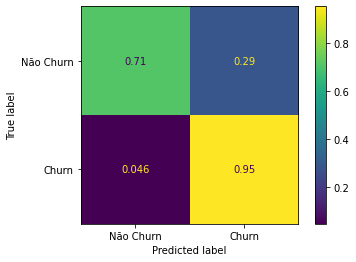

In [ ]:
# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred, normalize = 'true')

display = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = ['Não Churn', 'Churn'])

display.plot()
plt.show()

### ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

modelo_extrees = ExtraTreesClassifier()
modelo_extrees.fit( x_train, y_train.squeeze() )

print('Acertividade do treino: ', modelo_extrees.score(x_train, y_train))
print('Acertividade do teste: ', modelo_extrees.score(x_test, y_test.squeeze()))

Acertividade do treino:  0.9999837611371535
Acertividade do teste:  0.8857445979301087


In [ ]:
y_pred = modelo_extrees.predict(x_test)

print('Revocação: ', recall_score(y_test, y_pred))

Revocação:  0.9176983435047951


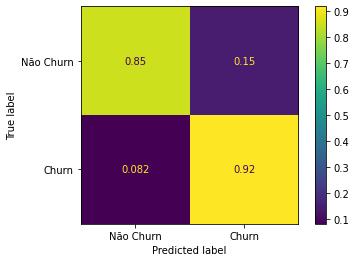

In [ ]:
# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred, normalize = 'true')

display = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = ['Não Churn', 'Churn'])

display.plot()
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier()
modelo_rf.fit( x_train, y_train.squeeze())

print('Acertividade do treino: ', modelo_rf.score(x_train, y_train ))
print('Acertividade do teste: ', modelo_rf.score(x_test, y_test.squeeze()))

Acertividade do treino:  0.9999729352285891
Acertividade do teste:  0.8872169055557961


In [ ]:
y_pred = modelo_rf.predict(x_test)
print('Revocação: ', recall_score(y_test, y_pred))

Revocação:  0.907846556233653


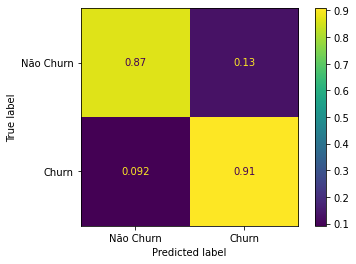

In [ ]:
# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred, normalize = 'true')

display = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = ['Não Churn', 'Churn'])

display.plot()
plt.show()

### Light Gradient Boosting

In [ ]:
from lightgbm import LGBMClassifier

modelo_lgb = LGBMClassifier(random_state=5)
modelo_lgb.fit(x_train, y_train.squeeze())

# Teste de Acuracidade (accuracy)
print('Acuracidade (treino): ', modelo_lgb.score( x_train, y_train ))
print('Acuracidade (teste): ', modelo_lgb.score( x_test, y_test ))

Acuracidade (treino):  0.8741325740762793
Acuracidade (teste):  0.8728619062053437


In [ ]:
y_pred = modelo_lgb.predict(x_test)
print('Revocação: ', recall_score(y_test, y_pred))

Revocação:  0.9122493461203138


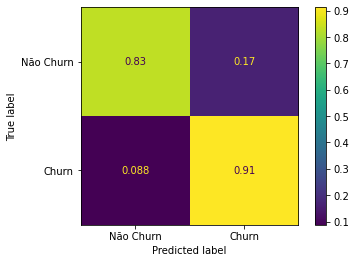

In [ ]:
# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred, normalize = 'true')

display = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = ['Não Churn', 'Churn'])

display.plot()
plt.show()

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)
modelo_gb.fit(x_train, y_train)

# Teste de Acuracidade (accuracy)
print('Acuracidade (treino): ', modelo_gb.score( x_train, y_train ))
print('Acuracidade (teste): ', modelo_gb.score( x_test, y_test ))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acuracidade (treino):  0.8372757683688603
Acuracidade (teste):  0.8384358896635344


In [ ]:
y_pred = modelo_gb.predict(x_test)
print('Revocação: ', recall_score(y_test, y_pred))

Revocação:  0.8958587619877942


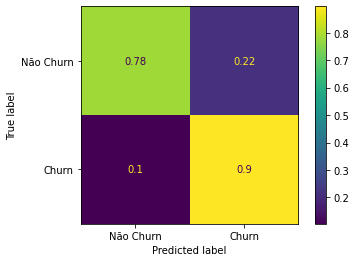

In [ ]:
# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred, normalize = 'true')

display = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = ['Não Churn', 'Churn'])

display.plot()
plt.show()

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instaciação do obj Algoritmo
modelo_knn = KNeighborsClassifier(n_neighbors=11)
# Treino # x = Features, y = Label/Target
modelo_knn.fit(x_train, y_train.squeeze()) # squeeze() -> df para series]

# Teste de Acuracidade (accuracy)
print('Acuracidade (treino): ', modelo_knn.score( x_train, y_train ))
print('Acuracidade (teste): ', modelo_knn.score( x_test, y_test ))

Acuracidade (treino):  0.8611035931190525
Acuracidade (teste):  0.8407093058502576


In [ ]:
y_pred = modelo_knn.predict(x_test)
print('Revocação: ', recall_score(y_test, y_pred))

Revocação:  0.8802964254577158


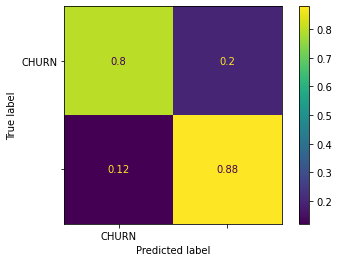

In [ ]:
# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred, normalize = 'true')

display = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = y)

display.plot()
plt.show()

### AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

modelo_adaboost = AdaBoostClassifier()
modelo_adaboost.fit( x_train, y_train.squeeze() )

print('Acertividade do treino: ', modelo_adaboost.score(x_train, y_train))
print('Acertividade do teste: ', modelo_adaboost.score(x_test, y_test.squeeze()))

Acertividade do treino:  0.8269207868270344
Acertividade do teste:  0.8269172476508033


In [ ]:
y_pred = modelo_adaboost.predict(x_test)
print( 'Revocação: ', recall_score( y_test, y_pred ))

Revocação:  0.8642109851787271


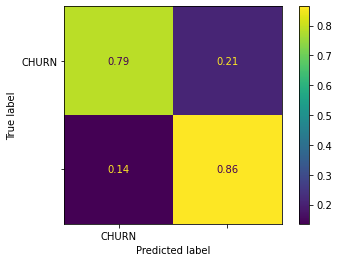

In [ ]:
# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred, normalize = 'true')

display = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = y)

display.plot()
plt.show()

### SVM

In [ ]:
from sklearn.svm import SVC

modelo_svc = SVC(max_iter = 2000)
modelo_svc.fit(x_train, y_train.squeeze())

print('Acertividade do treino: ', modelo_svc.score(x_train, y_train))
print('Acertividade do teste: ', modelo_svc.score(x_test, y_test.squeeze()))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Acertividade do treino:  0.5892108995247426
Acertividade do teste:  0.5895509461741654


In [ ]:
y_pred = modelo_svc.predict(x_test)
print('Revocação: ', recall_score(y_test, y_pred))

Revocação:  0.5735832606800348


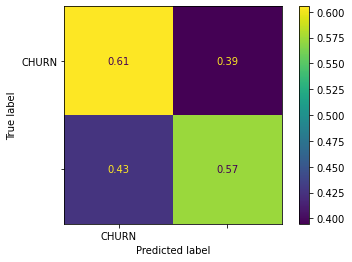

In [ ]:
# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred, normalize = 'true')

display = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = y)

display.plot()
plt.show()

## Gráficos 📊


Inicialmente, cogitamos que o churn pode estar relacionado a um alto número de punições aplicadas pela empresa, o que nos levou a construir um gráfico que permitisse a mensuração desse número. Como conclusão, percebemos que o número de banimentos é bastante alto

Este gráfico ilustra quantos avisos e punições de cada tipo ocorreram, em um determinado período

In [ ]:
data = df_punicao_count
fig = px.bar(data, y='PUNISHMENT_TYPE', title="Tipos de punição", color_discrete_sequence=["#FD6250"])
fig.update_xaxes(title_text='Punições')
fig.update_yaxes(title_text='Ocorrências')
fig.show()

NameError: ignored

Inicialmente, pensamos em quais modais de transporte mais comuns para a Rappi, e se há alguma diferença entre o número de churns dentre os diferentes veículos.

Este gráfico ilustra a proporção da utilização de cada modal pelos Rt's.

In [ ]:
new_df = df_supply['TRANSPORT_MEDIA_TYPE'].value_counts()
fig = px.pie(new_df, values='TRANSPORT_MEDIA_TYPE', title="Modais de transporte utilizados", names=(new_df).index, color_discrete_sequence=["#FD6250", "#C61515", "#EFBDB0"])
fig.show()

Posteriormente, comparamos os modais mais utilizados pelos RT's em geral com os modais mais utilizados pelos Rt's que deram churn, o que nos levou a uma importante descoberta: os Rt's que utilizam motocicleta apresentam uma maior probabilidade de dar churn.

Este gráfico ilustra a proporção dos principais modais de transporte utilizados pelos Rt's que deram chrun.

In [ ]:
df_infos_pie = df_modal
fig_infos_pie = px.pie(df_infos_pie, values='TRANSPORT_MEDIA_TYPE', names=(df_infos_pie).index, title="Meios de transporte dos RTs que deram churn", color_discrete_sequence=["#FD6250", "#EFBDB0", "#C61515", "yellow", "yellow", "yellow"])
fig_infos_pie.show()

Inicialmente, cogitamos que o gênero poderia haveria trazer algum impacto em relação ao churn, mas após a análise dos dados, percebemos que a proporção de churn de homens e mulheres é basicamente a mesma em relação à distribuição. 

Este gráfico ilustra a proporção por gênero de entregadores da Rappi.

In [ ]:
# This dataframe has 244 lines, but 4 distinct values for `day`
df_infos_pie = gender_count_infos
fig_infos_pie = px.pie(df_infos_pie, values='GENERO', names=(df_infos_pie).index, title="Proporção por gênero", color_discrete_sequence=["#FD6250", "#EFBDB0", "#FCFA4E"])
fig_infos_pie.show()

Inicialmente, pensamos que o nível de um entregador poderia estar relacionado à sua probabilidade de dar churn. Então, fizemos uma proporção entre o ranking dos entregadores que deram churn, concluindo que o maior número de churns ocorre no bronze (também apresenta o maior número de entregadores).

O gráfico abaixo ilustra o ranking dos entregadores que deram churn.

In [ ]:
fig = px.pie(df_ranks, values='LEVEL_NAME', names=(df_ranks).index, title="Ranking dos Rts na plataforma", color_discrete_sequence=["#FD6250", "#C61515", "#EFBDB0", "#FF7400", "#FCFA4E"])
fig.show()

Inicialmente, pensamos que o ganho de um funcionário pode interferir na sua chance de dar churn. Para evitar os valores discrepantes da tabela, decidimos calcular o valor de um entregador comum através da utilização da mediana, obtendo o primeiro, segundo e terceiro quartil. Percebemos então que alguns Rp's apresentam uma renda baixa, provavelmente porque utilizam o Rappi como uma fonte de renda secundária. No terceiro quartil, os funcionários que trabalham de forma integral com o aplicativo demonstram que é uma fonte de renda interessante, que está acima da média da população.

Este gráfico mostra os ganhos, em reais, dos funcionários localizados no primeiro, segundo e terceiro quartil.

In [ ]:
df_earnings_sum = df_earns.groupby(by=['STOREKEEPER_ID'])['EARNINGS'].sum()
df_earnings_sorted = df_earnings_sum.sort_values(ascending=False)
df_earnings_first_quantile = df_earnings_sorted.quantile(q=0.25)*4.4
df_earnings_second_quantile = df_earnings_sorted.quantile(q=0.50)*4.4
df_earnings_third_quantile = df_earnings_sorted.quantile(q=0.75)*4.4

data = [df_earnings_first_quantile, df_earnings_second_quantile, df_earnings_third_quantile]
labels = ['0~25% do montante de entregadores','26~50% do montante de entregadores', '50~75% do montante de entregadores']
fig = px.bar(x = labels, y = data, title="Ganho dos entregadores",  color_discrete_sequence=["#FD6250"])
fig.update_xaxes(title_text='Media de Ganhos por Entregadores')
fig.update_yaxes(title_text='Ganhos em Reais Totais')
fig.show()

Inicialmente, pensamos que os entregadores que deram churn apresentavam uma alta taxa de cancelamentos de pedidos. Então, percebemos que a maior parte cancela poucos pedidos, mas há um certo número de entregadores que cancelaram um alto número de pedidos e deram churn.

Este gráfico mostra a distribuição entre o número de empregadores que deram churn e o seus números de pedidos cancelados.

<center><img src="https://ik.imagekit.io/wfexexpan/newplot__2__C3u-ljhYt.png?ik-sdk-version=javascript-1.4.3&updatedAt=1660279976601"</center>

### Backup

In [ ]:
df_orders_done_and_cancel = pd.read_csv('/content/drive/MyDrive/Bases/Ordens Done e Cancel.csv')
df_accounts_churn = pd.read_csv('/content/drive/MyDrive/Bases/criacao contas churn-002.csv')
df_orders_done_and_cancel_two = df_orders_done_and_cancel[['ORDERS_CANCEL']]
df_accounts_churn_two = df_accounts_churn[['ID']]
df_orders_and_churns = df_accounts_churn_two.merge(df_orders_done_and_cancel_two, how='inner', left_on='ID', right_on='STOREKEEPER_ID')

In [ ]:
final_df_orders_and_churns = df_orders_and_churns.drop_duplicates(keep='first')

quantity_zero_to_fifteen = final_df_orders_and_churns.query('ORDERS_CANCEL >= 0 and ORDERS_CANCEL <= 15').shape[0]
quantity_fifteen_to_thirty = final_df_orders_and_churns.query('ORDERS_CANCEL > 15 and ORDERS_CANCEL <= 30').shape[0]
quantity_thirty_to_forty = final_df_orders_and_churns.query('ORDERS_CANCEL > 30 and ORDERS_CANCEL <= 40').shape[0]
quantity_forty_to_fifty = final_df_orders_and_churns.query('ORDERS_CANCEL > 40 and ORDERS_CANCEL <= 50').shape[0]

In [ ]:
import plotly.graph_objects as go

x = ['0 a 15 pedidos cancelados', '16 a 30 pedidos cancelados', '31 a 40 pedidos cancelados', '41 a 50 pedidos cancelados']
y = [quantity_zero_to_fifteen, quantity_fifteen_to_thirty, quantity_thirty_to_forty, quantity_forty_to_fifty]

fig = go.Figure(data=[go.Bar(x=x, y=y,)])

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Quantidade de entregadores churn que cancelaram pedidos')
fig.show()

# Pycaret

In [ ]:
# !pip install jinja2

In [ ]:
#!pip install markupsafe==2.0.1

In [ ]:
#!pip install pycaret

In [ ]:
# !pip install pycaret pandas shap

In [ ]:
!pip uninstall scipy 

Found existing installation: scipy 1.7.3
Uninstalling scipy-1.7.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scipy-1.7.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scipy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/scipy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.7/dist-packages/scipy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/scipy/*
Proceed (y/n)? 

In [ ]:
!pip install scipy

In [ ]:
!pip install pycaret==2.3.10 markupsafe==2.0.1 Jinja2 -qq

In [ ]:
!pip install numpy==1.21.5

In [ ]:
from pycaret.utils import version
version()

In [ ]:
import jinja2
from pycaret.classification import *

In [ ]:
df

,STOREKEEPER_ID,IS_ACTIVE,TRANSPORT_MEDIA_TYPE_bicycle,TRANSPORT_MEDIA_TYPE_car,TRANSPORT_MEDIA_TYPE_motorbike,CHURNED,MINUTES_PUNISHMENTS,NUM_PUNISHMENTS,AGE,NUM_CHURNS,DELIVERIES_COUNT,DISTANCE_MEDIAN,FRETE_MEDIO,CIDADE_Belo Horizonte,CIDADE_Grande São Paulo,CIDADE_Outros,CIDADE_Rio de Janeiro,SHIPPING_PER_DISTANCE,CANCEL_RATE
0,1561246,1,0,0,1,0,0,0,34.0,0.0,30.0,3.2,62.25000,0.0,0.0,1.0,0.0,19.456250,NaN
1,1561210,1,0,0,1,0,0,0,24.0,0.0,50.0,4.1,43.43750,0.0,1.0,0.0,0.0,10.595122,NaN
2,1561205,1,0,0,1,0,0,0,25.0,0.0,51.0,3.5,42.21875,0.0,0.0,1.0,0.0,12.065714,NaN
3,1561173,1,0,0,1,0,0,0,28.0,0.0,44.0,4.2,47.25000,0.0,1.0,0.0,0.0,11.247619,NaN
4,1561132,1,0,0,1,0,0,0,23.0,0.0,14.0,3.2,32.78125,0.0,0.0,1.0,0.0,10.240625,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201536,1372362,0,0,0,1,1,0,0,31.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201537,1503585,0,1,0,0,1,15,2,31.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201538,1399642,0,0,0,1,1,0,0,31.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201539,1373182,0,0,0,1,1,0,1,31.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_novo = df
df_novo = df_novo.drop(['IS_ACTIVE','DISTANCE_MEDIAN',	'FRETE_MEDIO', 'CANCEL_RATE','DELIVERIES_COUNT','SHIPPING_PER_DISTANCE', 'CIDADE_Belo Horizonte',	'CIDADE_Grande São Paulo',	'CIDADE_Rio de Janeiro', 'CIDADE_Outros', 'AGE'], axis=1)
df_novo

,STOREKEEPER_ID,TRANSPORT_MEDIA_TYPE_bicycle,TRANSPORT_MEDIA_TYPE_car,TRANSPORT_MEDIA_TYPE_motorbike,CHURNED,MINUTES_PUNISHMENTS,NUM_PUNISHMENTS,NUM_CHURNS
0,1561246,0,0,1,0,0,0,0.0
1,1561210,0,0,1,0,0,0,0.0
2,1561205,0,0,1,0,0,0,0.0
3,1561173,0,0,1,0,0,0,0.0
4,1561132,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...
201536,1372362,0,0,1,1,0,0,1.0
201537,1503585,1,0,0,1,15,2,1.0
201538,1399642,0,0,1,1,0,0,1.0
201539,1373182,0,0,1,1,0,1,1.0


In [ ]:
# cat_features = ['IS_ACTIVE',	'TRANSPORT_MEDIA_TYPE_bicycle',	'TRANSPORT_MEDIA_TYPE_car',	'TRANSPORT_MEDIA_TYPE_motorbike']

In [ ]:
# experiment = setup(df_novo, target='CHURNED', categorical_features=cat_features, ignore_features = ['STOREKEEPER_ID'])

In [ ]:
s = setup(df_novo, target="CHURNED", ignore_features = ['STOREKEEPER_ID'])

,Description,Value
0,session_id,4017
1,Target,CHURNED
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(201541, 8)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['STOREKEEPER_ID'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='CHURNED',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=N...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('c

In [ ]:
#show the best model and their statistics
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8892,0.8313,0.1182,0.6790,0.2012,0.1723,0.2517,0.743
gbc,Gradient Boosting Classifier,0.8868,0.8189,0.0931,0.6482,0.1628,0.1372,0.2156,4.822
ada,Ada Boost Classifier,0.8821,0.7925,0.0090,0.5757,0.0177,0.0142,0.0601,1.757
ridge,Ridge Classifier,0.8818,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.057
qda,Quadratic Discriminant Analysis,0.8818,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.062
lda,Linear Discriminant Analysis,0.8818,0.6480,0.0000,0.0000,0.0000,-0.0001,-0.0012,0.118
dummy,Dummy Classifier,0.8818,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.043
lr,Logistic Regression,0.8817,0.6033,0.0002,0.0867,0.0005,0.0002,0.0013,1.329
rf,Random Forest Classifier,0.8749,0.7775,0.1952,0.4349,0.2695,0.2117,0.2322,5.972
knn,K Neighbors Classifier,0.8748,0.7068,0.1738,0.4289,0.2467,0.1917,0.2154,1.245


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4017, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
evaluate_model(best)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4017, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
knn = create_model('knn')